In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ETTh1.csv")
ts = data.HUFL
ts.head(10)

ts.rolling(2).mean().head(10)

print(len(ts))

17420


In [3]:
ts_tensor = torch.Tensor(ts).reshape(1, 1, -1)

kernel = [0.5, 0.5]
kernel_tensor = torch.Tensor(kernel).reshape(1, 1, -1)
F.conv1d(ts_tensor, kernel_tensor)

X = data.HUFL
X_tensor = torch.Tensor(X).reshape(1,1,-1)

In [4]:
y = data.HUFL.rolling(5).mean()
y = y[4:, ].to_numpy()
y_tensor = torch.Tensor(y).reshape(1,1,-1)
y_tensor

tensor([[[ 5.4250,  5.3848,  5.6796,  ..., -2.3710,  0.7234,  3.0008]]])

In [6]:
net = nn.Conv1d(1, 1, 5, padding_mode = "reflect", bias = False)

In [7]:
net.weight.data.numpy()

array([[[-0.07603097, -0.38288236,  0.17074347,  0.14709944,
         -0.23474261]]], dtype=float32)

In [8]:
net(X_tensor)

tensor([[[-2.2513, -2.0708, -2.2809,  ..., -0.7930, -1.9559,  1.6958]]],
       grad_fn=<ConvolutionBackward0>)

In [9]:
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [10]:
running_loss = 0.0
for iteration in range(1001):
    # Zeroing gradients. For more,
    # see: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
    optimizer.zero_grad()

    # Forward propagation
    outputs = net(X_tensor)  

    # Mean squared error
    loss_value = torch.mean((outputs - y_tensor)**2)

    # Computing gradients
    loss_value.backward()

    # Changing network parameters with optimizer
    optimizer.step()

    # Extractin loss value from tensor
    running_loss += loss_value.item()

    if iteration % 50 == 0:
        print('[%d] loss: %.3f' % (iteration, loss_value.item()))
        print(net.weight.data.numpy())

[0] loss: 177.885
[[[-0.06603097 -0.37288237  0.18074347  0.15709944 -0.2247426 ]]]
[50] loss: 1.784
[[[ 0.22371961 -0.08539155  0.4600972   0.43342796  0.05373042]]]
[100] loss: 0.674
[[[ 0.22284956 -0.09144803  0.4308523   0.3969345   0.0255057 ]]]
[150] loss: 0.557
[[[ 0.23988208 -0.07709083  0.42061907  0.38177294  0.02372365]]]
[200] loss: 0.480
[[[ 0.2517562  -0.06472018  0.40843755  0.36749545  0.02749188]]]
[250] loss: 0.419
[[[ 0.25936323 -0.05368206  0.39533404  0.35455734  0.03595959]]]
[300] loss: 0.365
[[[ 0.2640176  -0.04324064  0.38185886  0.34258476  0.04733851]]]
[350] loss: 0.316
[[[ 0.2667897  -0.03284806  0.3683762   0.33117232  0.06006058]]]
[400] loss: 0.272
[[[ 0.26833376 -0.02221023  0.35516074  0.32011384  0.07309186]]]
[450] loss: 0.232
[[[ 0.2689717  -0.01123794  0.34241635  0.30936936  0.08584263]]]
[500] loss: 0.197
[[[2.6884454e-01 3.8913277e-05 3.3028793e-01 2.9898533e-01 9.8000199e-02]]]
[550] loss: 0.166
[[[0.26802373 0.01153684 0.318871   0.28903466 0.

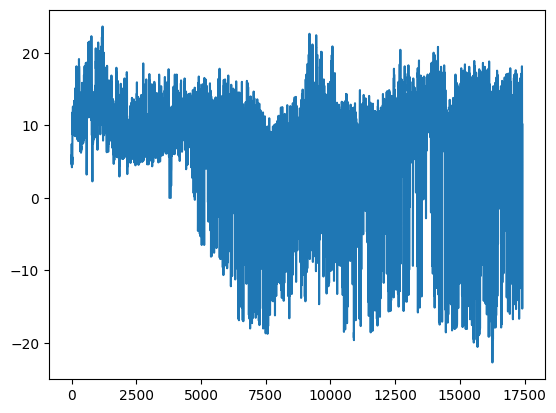

In [13]:
plt.plot(data['HUFL'])
plt.savefig("data", dpi=1000)

In [14]:
from DLinear.test_class_1 import DLinearModel
model = DLinearModel(X_tensor)


ModuleNotFoundError: No module named 'DLinear'